In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline

In [2]:
from IPython.core.pylabtools import figsize
#figsize(15,20)

In [3]:
to_drop = ['Name','New_Price','Location']

In [4]:
df_train=pd.read_excel('./dataset/Data_Train.xlsx')

In [5]:
def clean_data(data):
    data = data.drop(to_drop,axis=1)
    data['Mileage']= pd.to_numeric(data['Mileage'].str.extract(r'^(\d*)', expand=False)) 
    data['Engine']=pd.to_numeric(data['Engine'].str.extract(r'^(\d*)', expand=False))
    data['Power']=pd.to_numeric(data['Power'].str.extract(r'^(\d*)', expand=False))
   #data.fillna(data.mean(),inplace=True)
    return data


In [6]:
df_train=clean_data(df_train)

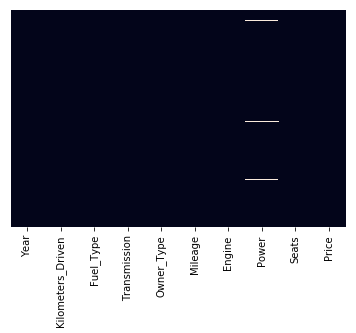

In [7]:
sns.heatmap(df_train.isna() ,yticklabels=False,cbar=False)
#plt.savefig('filename.png', dpi=300)

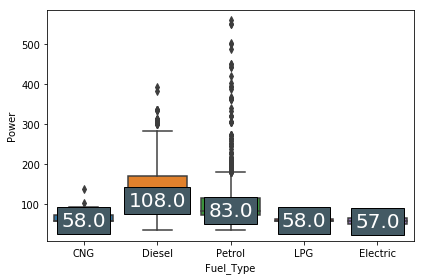

In [8]:
box_plot =sns.boxplot(x='Fuel_Type',y='Power', data=df_train)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median  line
    _y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        _y, 
        f'{_y}', 
        ha='center', 
        va='center', 
        fontweight='normal', 
        size=20,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()


In [9]:
def inpute_power(cols):
    Power=cols[0]
    Fuel_Type=cols[1]
#     print(Power)
    
    if pd.isnull(Power):
        if Fuel_Type == 'CNG':
            return 58
        elif Fuel_Type == 'Diesel':
            return 108
        elif Fuel_Type == 'Petrol':
            return 83
        elif Fuel_Type == 'LPG':
            return 58
        else:
            return 57
    else:
        return Power
        

In [10]:
df_train['Power'] = df_train[['Power','Fuel_Type']].apply(inpute_power,axis=1)

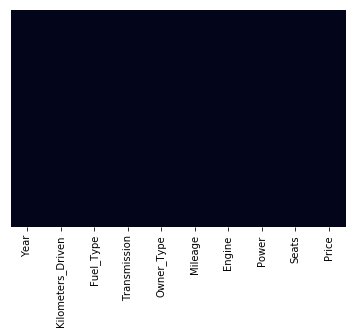

In [11]:
sns.heatmap(df_train.isna() ,yticklabels=False,cbar=False)

In [12]:
df_train.fillna(df_train.mean(),inplace=True)
df_train['Seats'] = df_train['Seats'].replace(0.0,4.0)

In [13]:
df_train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,17.710487,1621.276450,112.438777,5.279400,9.479468
std,3.269742,9.126884e+04,4.578434,599.553865,53.402757,0.803304,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.000000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.000000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.000000,1493.000000,94.000000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.000000,1969.000000,138.000000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.000000,5998.000000,560.000000,10.000000,160.000000


In [14]:
#sns.pairplot(data=df_train)

In [15]:
fuel_type=pd.get_dummies(df_train['Fuel_Type'],drop_first=True)
owner_type=pd.get_dummies(df_train['Owner_Type'],drop_first=True)
transmission_type=pd.get_dummies(df_train['Transmission'],drop_first=True)

In [16]:
df_train=pd.concat([df_train,fuel_type,owner_type,transmission_type],axis=1)
df_train = df_train.drop(['Fuel_Type','Owner_Type','Transmission'],axis=1)

In [17]:
y=df_train['Price']

In [18]:
df_train = df_train.drop(['Price'],axis=1)

In [19]:
X=df_train

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=34,shuffle=False)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [23]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = regressor.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print(" coefficient of determination R^2 of the prediction.: " , model_score)
y_pred = regressor.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_pred))

print('Acuracy: %.2f' % regressor.score(X_test, y_test))

 coefficient of determination R^2 of the prediction.:  0.6779932637747192
Mean squared error: 34.00
Test Variance score: 0.73
Acuracy: 0.73


In [25]:
# plt.scatter(X_train, y_train, color='green')
# plt.plot(X_train, regressor.predict(X_train), color='red')
# plt.show()

In [26]:
import statsmodels.formula.api as sm

In [27]:
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

In [28]:
X=np.append(arr=np.ones((6019,1)).astype(int),values=X,axis=1)

In [29]:
X_opt = X[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14]]
regressorOLS=sm.OLS(endog=y,exog=X_opt).fit()
# regressorOLS.summary()
SL = 0.05
X_Modeled = backwardElimination(X_opt, SL)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_Modeled,y,test_size=0.3,random_state=4,shuffle=False)

In [31]:
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:

model_score = regressor2.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print(" coefficient of determination R^2 of the prediction.: " , model_score)
y_pred = regressor2.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_pred))

print('Acuracy: %.2f' % regressor2.score(X_test, y_test))


 coefficient of determination R^2 of the prediction.:  0.6723640558404924
Mean squared error: 34.49
Test Variance score: 0.73
Acuracy: 0.73


In [33]:
from sklearn.tree import DecisionTreeRegressor
regressor3= DecisionTreeRegressor(random_state=50)
regressor3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=50, splitter='best')

In [34]:

model_score = regressor3.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print(" coefficient of determination R^2 of the prediction.: " , model_score)
y_pred = regressor3.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_pred))

print('Acuracy: %.2f' % regressor3.score(X_test, y_test))

 coefficient of determination R^2 of the prediction.:  0.9867060373717779
Mean squared error: 21.96
Test Variance score: 0.83
Acuracy: 0.83


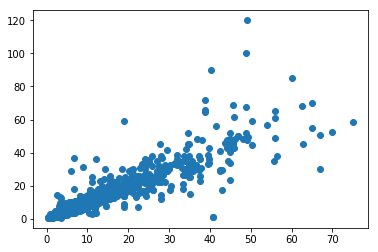

In [35]:
plt.scatter(y_pred,y_test);

(array([105., 334., 312., 328., 143., 115.,  53.,  66.,  43.,  26.,  18.,
         26.,  31.,  14.,  14.,  17.,  17.,  13.,  15.,   7.,   6.,   6.,
         12.,  13.,   8.,   5.,   6.,   3.,   6.,  11.,   6.,   3.,   7.,
          2.,   0.,   1.,   0.,   5.,   0.,   1.,   0.,   2.,   0.,   2.,
          2.,   0.,   1.,   0.,   0.,   1.]),
 array([ 0.45 ,  1.941,  3.432,  4.923,  6.414,  7.905,  9.396, 10.887,
        12.378, 13.869, 15.36 , 16.851, 18.342, 19.833, 21.324, 22.815,
        24.306, 25.797, 27.288, 28.779, 30.27 , 31.761, 33.252, 34.743,
        36.234, 37.725, 39.216, 40.707, 42.198, 43.689, 45.18 , 46.671,
        48.162, 49.653, 51.144, 52.635, 54.126, 55.617, 57.108, 58.599,
        60.09 , 61.581, 63.072, 64.563, 66.054, 67.545, 69.036, 70.527,
        72.018, 73.509, 75.   ]),
 <a list of 50 Patch objects>)

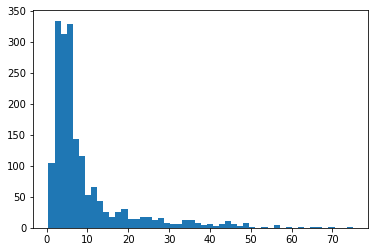

In [36]:
plt.hist(x=y_pred,bins=50)

In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor4= RandomForestRegressor(n_estimators=30, random_state=25)
regressor4.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=25, verbose=0, warm_start=False)

In [61]:
model_score = regressor4.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print(" coefficient of determination R^2 of the prediction.: " , model_score)
y_pred = regressor4.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_pred))

print('Acuracy: %.2f' % regressor4.score(X_test, y_test))

 coefficient of determination R^2 of the prediction.:  0.966925335381853
Mean squared error: 18.07
Test Variance score: 0.86
Acuracy: 0.86


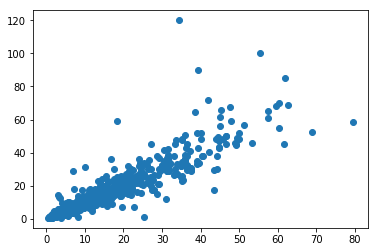

In [68]:
plt.scatter(y_pred,y_test);

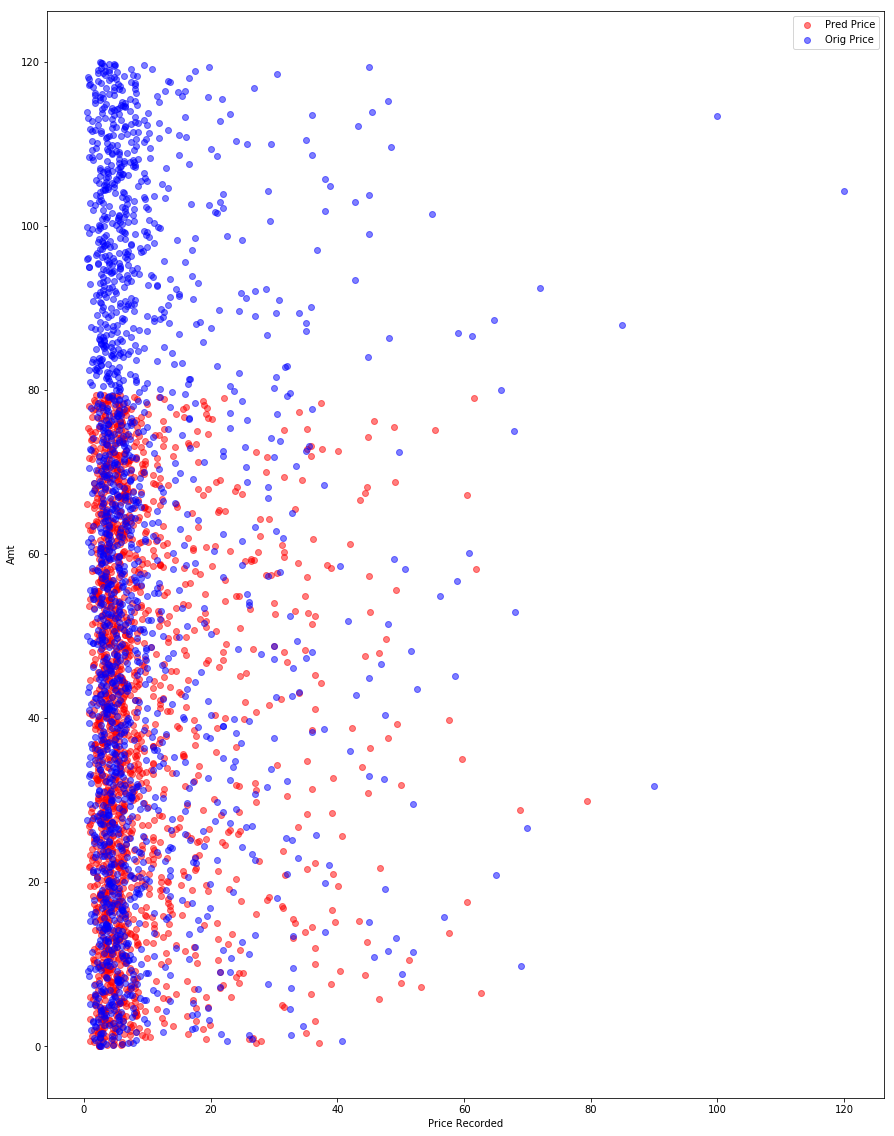

In [87]:
figsize(15,20)
plt.scatter(y_pred,np.linspace(0,np.max(y_pred),1806),c="red",label='Pred Price',alpha=0.5)
plt.scatter(y_test,np.linspace(0,np.max(y_test),1806),c="blue", label='Orig Price',alpha=0.5)
plt.xlabel("Price Recorded")
plt.ylabel("Amt")
plt.legend()

120.0